In [15]:
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms 
import statsmodels.api as sm
import matplotlib.pyplot as plt

def linearity_test(model, y):
   
    """ Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    ----------
     model - fitted OLS model from statsmodels
     y - observed values """

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

def errors_mean_test(resid, confidence):
    import scipy.stats as stats
    results =stats.ttest_1samp(resid, 0)
    print("\nStatistic:", results.statistic, ", P-Value: ", results.pvalue )

    if(results.pvalue > confidence):
        print('Test Passed: ✅✅✅✅✅✅✅✅✅')
       
    else: 
        print('Test Passed: ❌❌❌❌❌❌❌❌❌')

def errors_normal_test(resid, confidence):

    from scipy.stats import normaltest
    normal_test_result = normaltest(resid)
    
    print('\nStatistic: ', normal_test_result.statistic, '\nP-Value: ', normal_test_result.pvalue)

    if(normal_test_result.pvalue > confidence):
        print('Normal Test pass:  ✅✅✅✅✅✅✅✅✅')
     
    else:
        print('Normal Test pass:  ❌❌❌❌❌❌❌❌❌')
     

    from scipy.stats import kstest
    kstest_result = kstest(resid, 'norm')
    
    print('\nStatistic: ', kstest_result.statistic, '\nP-Value: ', kstest_result.pvalue)

    if(kstest_result.pvalue > confidence):
        print('KS Test pass:  ✅✅✅✅✅✅✅✅✅')
      
    else:
        print('KS Test pass:  ❌❌❌❌❌❌❌❌❌')

def BP_test(resid, exog, confidence):
    
    test_BP = sms.het_breuschpagan(resid, exog)
    print('\nLM Statistic: ',test_BP[0],'\nP-Value:',test_BP[1],'\nF-Statistic:',test_BP[2],'\nF P-Value:',test_BP[3])
    print('\nThe Null hypothesis is that the errors are homoskedastic.')

    if(test_BP[1] > confidence):
        print('BP-LM Passed: ✅✅✅✅✅✅✅✅✅')
       
    else: 
        print('BP-LM Passed: ❌❌❌❌❌❌❌❌❌')
       

    if(test_BP[3] > confidence):
        print('BP-F Passed: ✅✅✅✅✅✅✅✅✅')
    else: 
        print('BP-F Passed: ❌❌❌❌❌❌❌❌❌')

def GQ_test(resid, exog, confidence):
    
    test_GQ = sms.het_goldfeldquandt(resid, exog)

    print('\nF-Statistic:',test_GQ[0], '\nP-Value:', test_GQ[1])
    print('\nThe Null hypothesis is that the variance in the two sub-samples are the same. The alternative hypothesis, can be increasing, i.e. the variance in the second sample is larger than in the first, or decreasing or two-sided. \n P-Value is calculated for the alternative hypothesis.')

    if(test_GQ[1] <= confidence):
        print('GQ Passed: ✅✅✅✅✅✅✅✅✅')
       
    else: 
        print('GQ Passed: ❌❌❌❌❌❌❌❌❌')
       
def White_test(resid, exog, confidence):

    test_white = sms.het_white(resid, exog)
    print('\nLM Statistic: ',test_white[0],'\nP-Value:',test_white[1],'\nF-Statistic:',test_white[2],'\nF P-Value:',test_white[3])
    print('\nThe Null hypothesis is that the errors are homoskedastic.')

    if(test_white[1] > confidence):
        print('White-LM Passed: ✅✅✅✅✅✅✅✅✅')
    else: 
        print('White-LM Passed: ❌❌❌❌❌❌❌❌❌')

    if(test_white[3] > confidence):
        print('White-F Passed: ✅✅✅✅✅✅✅✅✅')
    else: 
        print('White-F Passed: ❌❌❌❌❌❌❌❌❌')

def Glejser_test(resid, x_multiple):

    abs_resid = abs(resid)
    aux_model = sm.OLS(abs_resid,x_multiple)
    aux_results = aux_model.fit()
    print(aux_results.summary())
    print('\nR2:', aux_results.rsquared)
    print('N:', aux_results.nobs)
    print('Statistic(N*R2):', aux_results.nobs*aux_results.rsquared)  
    print('\nP-Values of coefficients:\n', aux_results.pvalues)

def multicollinearity_test(x_multiple, X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif = [variance_inflation_factor(x_multiple.values, i) for i in range(x_multiple.shape[1])]
    result = pd.DataFrame({'vif': vif[1:]}, index=X.columns).T
    print(result)


#Final multiple regression function

def multiple_reg_extended(x_multiple, y, confidence):

    model_multiple = sm.OLS(y,x_multiple)
    results = model_multiple.fit()
    
    print(results.summary())

    print('\n🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦   Hypothesis Testing(α=', confidence, ')    🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦')

    linearity_test(model_multiple.fit(),y)

    print('\n◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️        [I] Mean of errors is zero         ◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️')
    errors_mean_test(results.resid,confidence)
    

    print('\n◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️     [II] Homoskedasticity of errors     ◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️')
    

    #Breusch-Pagan 
    print('\n[II.a] 🟠 Breusch-Pagan Test 🟠')
    BP_test(results.resid, results.model.exog, confidence)

    #Goldfeld-Quandt
    print('\n[II.b] 🟡 Goldfeld-Quandt Test 🟡')
    GQ_test(results.resid, results.model.exog, confidence)
   
    #White
    print('\n[II.c] ⚪ White Test ⚪')
    White_test(results.resid, results.model.exog, confidence)

    #Glejser
    print('\n[II.d] 🟣 Glesjer Test 🟣')
    Glejser_test(results.resid, x_multiple)
  

    print('\n◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️   [III] Normality of errors   ◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️')
    errors_normal_test(results.resid, confidence)
    resid_df = pd.DataFrame(results.resid)
    resid_df.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
    print(resid_df.describe())
    
    

    print('\n◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️     [IV] Errors Autocorrelation Test    ◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️')
    
    smt.graphics.plot_acf(results.resid, lags=10, alpha=confidence)


    print('\n◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️     [V] Multicollinearity Test    ◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️◼️')
    multicollinearity_test(x_multiple,X)
    

        

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     293.8
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.00e-38
Time:                        19:18:16   Log-Likelihood:                -1585.5
No. Observations:                 170   AIC:                             3175.
Df Residuals:                     168   BIC:                             3181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -959.6523    732.526     -1.310      0.1

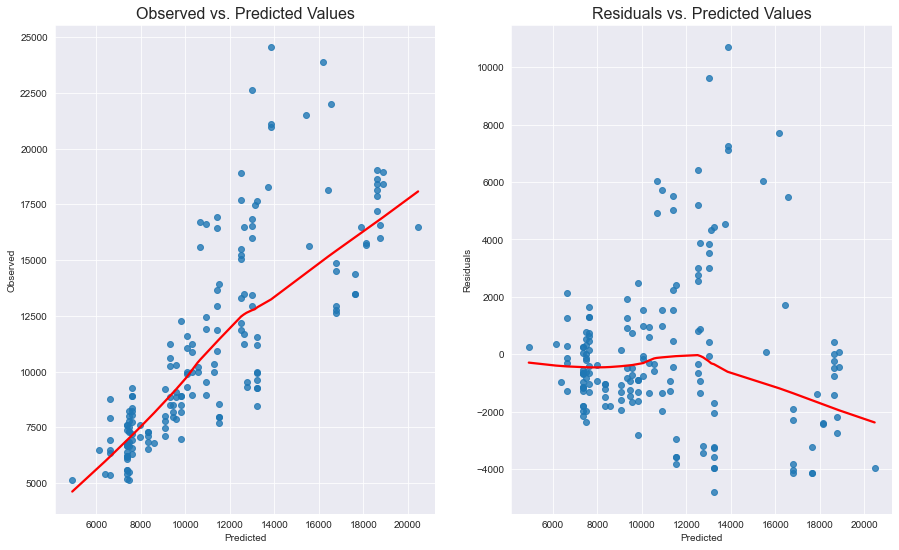

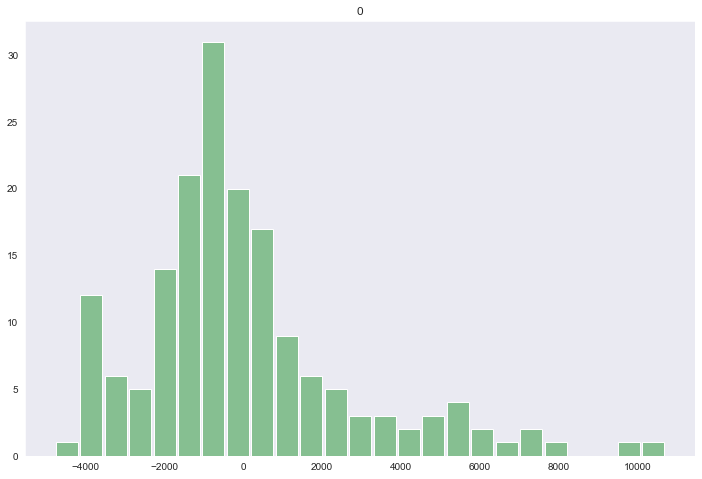

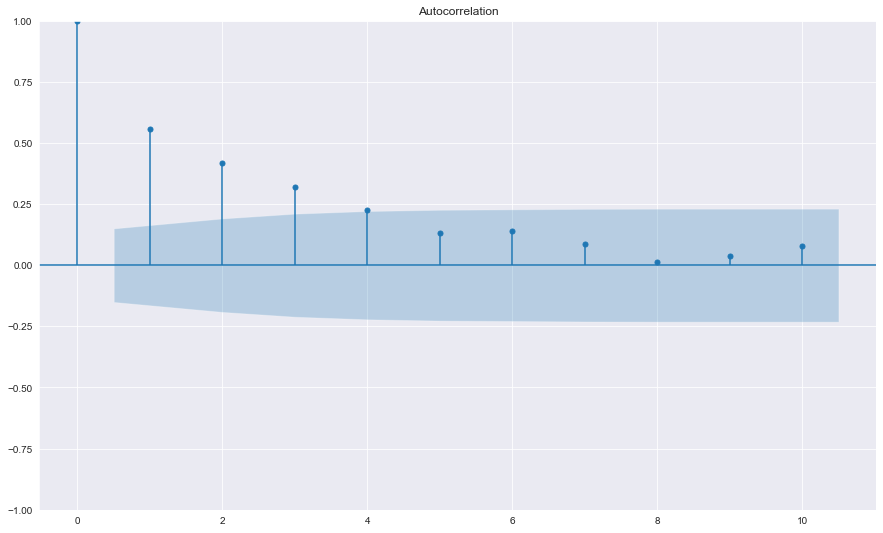

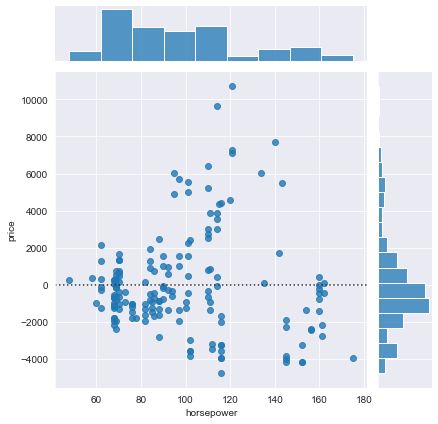

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms 
import statsmodels.api as sm
import statsmodels.tsa.api as smt


data = pd.read_excel('./Data/car_data_selection.xlsx')
df = pd.DataFrame(data)

#Config
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
pd.options.mode.chained_assignment = None  # default='warn'
confidence = 0.05

#Source for Y and the multiple X
numeric_variables = df[["price","carwidth","enginesize","stroke","compressionratio","horsepower","peakrpm","boreratio","curbweight","highwaympg","wheelbase","carlength","carheight","citympg"]]
ln_numeric_variables = np.log(numeric_variables)

#Change this if you wanna use different source for variables NOTE: Ex: ln_numeric_variables
final_variables = numeric_variables

#NOTE: SET THE DEPENDANT VARIABLE Y HERE
y = numeric_variables.price
#y = np.log(numeric_variables.price)

#seaborn.pairplot(numeric_variables, vars=['price', 'horsepower','enginesize', 'carwidth','stroke', 'peakrpm', 'compressionratio',"boreratio","curbweight","highwaympg","wheelbase","carlength","carheight","citympg"], kind='reg')
#seaborn.pairplot(numeric_variables, vars=['price', 'horsepower','enginesize', 'carwidth','stroke', 'peakrpm'], kind='reg')

#NOTE: SET THE INDEPENDANT VARIABLES X HERE
X = pd.DataFrame({
    #'carwidth': final_variables.carwidth,
    'horsepower': final_variables.horsepower,
    #'enginesize': final_variables.enginesize,
    #'highwaympg': final_variables.highwaympg,
    #'wheelbase': final_variables.wheelbase,
    #'carlength': final_variables.carlength,
    #'citympg': final_variables.citympg,
    #'curbweight': final_variables.curbweight,
})

# #Polynomial test
# final_variables['horsepower_square'] = final_variables['horsepower']**2

# X= pd.DataFrame({
#     'horsepower': final_variables.horsepower,
#     'horsepower_square': final_variables.horsepower_square 

# })

x_multiple = sm.add_constant(X)

multiple_reg_extended(x_multiple, y, confidence)

#Resid scatterplot
sns.jointplot(x="horsepower", y="price", data=numeric_variables, kind="resid")




